In [2]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append("/home/cgarcia_2002/nHits_count")

import functions_nHits  # Importa la función que necesitas
import importlib
import functions_spills

importlib.reload(functions_nHits)
importlib.reload(functions_spills)

%matplotlib inline

In [3]:
root_file_path = "/data/cgarcia_2002/WCTE/data/2384_calib_time/WCTE_offline_R2384S0P0.root" #bkg
#root_file_path = "/data/cgarcia_2002/WCTE/data/2385_calib_time/WCTE_offline_R2385S0P0.root"  #signal

# Open the ROOT file and get the TTree
file = uproot.open(root_file_path)

tree = file["WCTEReadoutWindows"]  

#DOWNLOAD INFO OF THE TREE
times_branch = tree["hit_pmt_calibrated_times"].array(library="np")
charge_branch = tree["hit_pmt_charges"].array(library="np")
event_number_branch = tree["event_number"].array(library="np")

mpmt_id_branch = tree["hit_mpmt_card_ids"].array(library="np")

times_branch_sorted = []
charge_branch_sorted = []
mpmt_id_branch_sorted = []

for times_evt, charges_evt, mpmt_evt in zip(times_branch, charge_branch, mpmt_id_branch):
    idx_sorted = np.argsort(times_evt)  # índice de orden
    times_branch_sorted.append(times_evt[idx_sorted])
    charge_branch_sorted.append(charges_evt[idx_sorted])
    mpmt_id_branch_sorted.append(mpmt_evt[idx_sorted])

In [4]:
#root_file_path = "/data/cgarcia_2002/WCTE/data/2384_calib_time/WCTE_offline_R2384S0P0.root" #bkg
root_file_path = "/data/cgarcia_2002/WCTE/data/2385_calib_time/WCTE_offline_R2385S0P0.root"  #signal

# Open the ROOT file and get the TTree
file = uproot.open(root_file_path)

tree_sig = file["WCTEReadoutWindows"]  

#DOWNLOAD INFO OF THE TREE
times_branch_sig = tree_sig["hit_pmt_calibrated_times"].array(library="np")
charge_branch_sig = tree_sig["hit_pmt_charges"].array(library="np")
event_number_branch_sig = tree_sig["event_number"].array(library="np")
mpmt_id_branch_sig = tree_sig["hit_mpmt_card_ids"].array(library="np")

times_branch_sorted_sig = []
charge_branch_sorted_sig = []
mpmt_id_branch_sorted_sig = []

for times_evt, charges_evt, mpmt_evt in zip(times_branch_sig, charge_branch_sig, mpmt_id_branch_sig):
    idx_sorted = np.argsort(times_evt)  # índice de orden
    times_branch_sorted_sig.append(times_evt[idx_sorted])
    charge_branch_sorted_sig.append(charges_evt[idx_sorted])
    mpmt_id_branch_sorted_sig.append(mpmt_evt[idx_sorted])

In [5]:
#times_branch_modified_2, charge_branch_modified_chargesTT, threshold_charges = functions_spills.repeat_spills_Charge(event_number_branch, times_branch_sorted, charge_branch_sorted)
times_branch_modified, threshold_times, deleted_index_dict = functions_spills.repeat_spills_nHits(event_number_branch, times_branch_sorted, 300, 5000, 4000)
times_branch_modified_sig, threshold_times_sig, deleted_index_dict_sig = functions_spills.repeat_spills_nHits(event_number_branch_sig, times_branch_sorted_sig, 300, 5000, 4000)


In [5]:
print(threshold_times)

{0: [217193.85035722656], 1: [74913.43695199219], 6: [195415.1007826172], 9: [135880.6137286719], 11: [194171.69019066406], 12: [254083.72742441407], 13: [121752.56322285156], 14: [21849.091558789063, 149371.2463385547], 17: [96384.88962680468], 21: [119096.67077109375], 25: [242640.99467257812], 41: [175789.8087253906], 47: [240435.40919609374], 48: [63628.19932832031], 49: [35173.370978671875], 53: [139740.22916953126], 55: [60024.07064550781, 128888.27422246094], 57: [150931.3676453125], 60: [265332.2800494141], 62: [61680.74866621094, 228824.6699826172, 261587.06875996094], 63: [10137.11456765625], 65: [190216.22507640626], 67: [64714.33979941406], 68: [19926.9210109375], 74: [871.1662740234375], 78: [13552.75074140625], 81: [216081.51863], 82: [1103.3667486328125], 86: [161220.5010925, 254140.3145826172], 87: [2407.026191015625], 89: [154420.20246992187], 91: [75830.78955078125], 97: [33832.1305290625], 98: [6000.862764765625], 101: [237436.8534560547], 102: [252084.3145826172], 1

In [6]:
charge_branch_filtered = functions_spills.delete_indices_list(charge_branch_sorted, deleted_index_dict)
charge_branch_filtered_sig = functions_spills.delete_indices_list(charge_branch_sorted_sig, deleted_index_dict_sig)


In [7]:
times_branch_modified_chargesTT, charge_branch_modified_chargesTT, threshold_charges, deleted_indices = functions_spills.repeat_spills_Charge(event_number_branch, times_branch_modified, charge_branch_filtered, 50, 50, threshold = 5000)
times_branch_modified_chargesTT_sig, charge_branch_modified_chargesTT_sig, threshold_charges_sig, deleted_indices_sig = functions_spills.repeat_spills_Charge(event_number_branch_sig, times_branch_modified_sig, charge_branch_filtered_sig, 50, 50, threshold = 5000)

In [8]:
print(threshold_charges)
print(threshold_times)

total = sum(len(lista) for lista in threshold_times.values())
print("Total de elementos en todas las listas:", total)

{7: [160656.4315723047], 13: [209100.7579060547], 21: [195205.40990058595], 34: [45285.236083984375], 59: [242512.115234375], 72: [4207.5251298828125], 87: [172003.36980117188, 193186.50817941406], 89: [125273.45578671875], 102: [46356.95570039062], 110: [212918.3781564453], 120: [83085.16816367187], 148: [226391.70154277343], 184: [207327.94645273438], 200: [22912.563435703127], 203: [156184.33106933592], 209: [100904.26239140626], 215: [14790.701297851563], 228: [175347.17392535156], 230: [81772.7303703125], 244: [86643.50564460938], 276: [239806.0649758203], 278: [210862.87073359374], 279: [268522.1102294922], 294: [116476.11890717187], 320: [130278.0483455078], 321: [41808.38403515625], 326: [128535.29693414063], 341: [162750.5442310547], 342: [108744.55962357031], 346: [231285.02490234375], 356: [8520.764770507812], 360: [33261.06170664063], 382: [139411.60290746094], 389: [94830.73162363282, 151998.56699859689], 394: [94292.14891679687], 395: [3942.26749765625], 399: [55525.78860

In [9]:
print(threshold_charges)
print(threshold_times)

coincidencias = 0
diferencias = 0

all_keys = set(threshold_charges) | set(threshold_times)

for key in all_keys:
    set_charges = set(threshold_charges.get(key, []))
    set_times = set(threshold_times.get(key, []))

    coincidencias += len(set_charges & set_times)
    diferencias += len(set_charges ^ set_times)


print(f"Coincidencias totales: {coincidencias}")
print(f"Diferencias totales: {diferencias}")

print("en total", (coincidencias + diferencias))

{7: [160656.4315723047], 13: [209100.7579060547], 21: [195205.40990058595], 34: [45285.236083984375], 59: [242512.115234375], 72: [4207.5251298828125], 87: [172003.36980117188, 193186.50817941406], 89: [125273.45578671875], 102: [46356.95570039062], 110: [212918.3781564453], 120: [83085.16816367187], 148: [226391.70154277343], 184: [207327.94645273438], 200: [22912.563435703127], 203: [156184.33106933592], 209: [100904.26239140626], 215: [14790.701297851563], 228: [175347.17392535156], 230: [81772.7303703125], 244: [86643.50564460938], 276: [239806.0649758203], 278: [210862.87073359374], 279: [268522.1102294922], 294: [116476.11890717187], 320: [130278.0483455078], 321: [41808.38403515625], 326: [128535.29693414063], 341: [162750.5442310547], 342: [108744.55962357031], 346: [231285.02490234375], 356: [8520.764770507812], 360: [33261.06170664063], 382: [139411.60290746094], 389: [94830.73162363282, 151998.56699859689], 394: [94292.14891679687], 395: [3942.26749765625], 399: [55525.78860

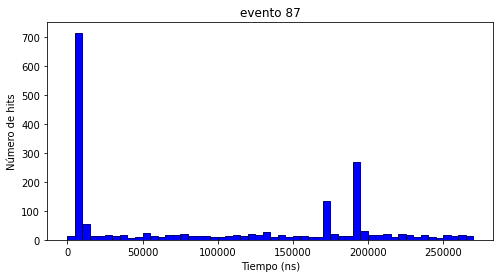

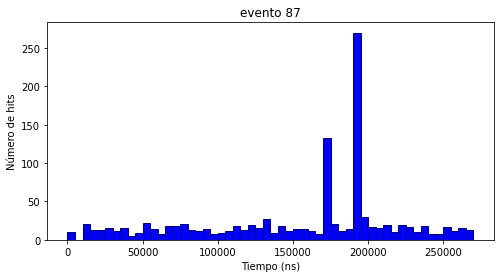

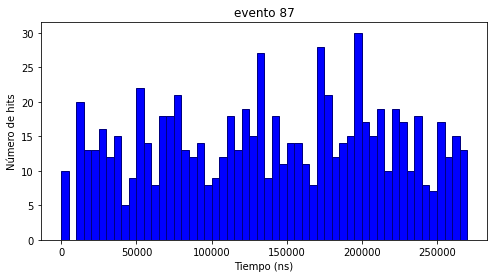

In [10]:
event_number = 87

plt.figure(figsize=(8, 4))
plt.hist(times_branch[event_number], range = [0, 270000], bins = 54,color='blue', edgecolor='navy')
plt.xlabel('Tiempo (ns)')
plt.ylabel('Número de hits')
plt.title(f'evento {event_number}')
plt.show()


plt.figure(figsize=(8, 4))
plt.hist(times_branch_modified[event_number], range = [0, 270000], bins = 54,color='blue', edgecolor='navy')
plt.xlabel('Tiempo (ns)')
plt.ylabel('Número de hits')
plt.title(f'evento {event_number}')
plt.show()

plt.figure(figsize=(8, 4))
plt.hist(times_branch_modified_chargesTT[event_number], range = [0, 270000], bins = 54,color='blue', edgecolor='navy')
plt.xlabel('Tiempo (ns)')
plt.ylabel('Número de hits')
plt.title(f'evento {event_number}')
plt.show()

In [11]:
times_branch_modified_50, threshold_times_50, _ = functions_spills.repeat_spills_nHits(event_number_branch, times_branch_modified_chargesTT, 5, 50, 50)
times_branch_modified_50_sig, threshold_times_50_sig, _ = functions_spills.repeat_spills_nHits(event_number_branch_sig, times_branch_modified_chargesTT_sig, 5, 50, 50)

In [82]:
print(threshold_times_50_sig)

total = sum(len(lista) for lista in threshold_times_50_sig.values())
print("Total de elementos en todas las listas:", total)


{0: [12439.435165234376, 22032.638464726562, 22791.737520859377, 112793.44949160157, 173426.30692265625, 228070.15699492188], 1: [50748.13794070313, 140238.36466170312, 236731.45645703125], 2: [105360.042746875, 159973.8506144531, 182266.99313828125], 3: [30880.480345585936, 100657.51238046875, 128017.263188125, 133464.04723183592, 178073.02808], 4: [25178.551147460938, 90058.59386242187, 129589.75755175781, 135113.08095351563, 141233.2229123047, 184871.5390396875, 210930.713740625], 5: [37214.96040039063, 97684.66054746094, 101062.74233722656, 138901.89424472657, 210063.29226414062], 6: [2030.8427916015626, 7970.029541015625, 114179.85274804688, 121220.87823007813, 124712.94155566406, 137169.31164710937, 144953.44595328125, 171905.6240184375], 7: [55389.39417402344, 60151.72588101563, 79521.3808279297, 200407.10975996093, 243096.26845351563, 251474.0821822656], 8: [8338.414433320313, 103972.34095640625, 126758.93058460938], 9: [961.2927431640625, 84528.7219109375, 89874.08468339844, 1

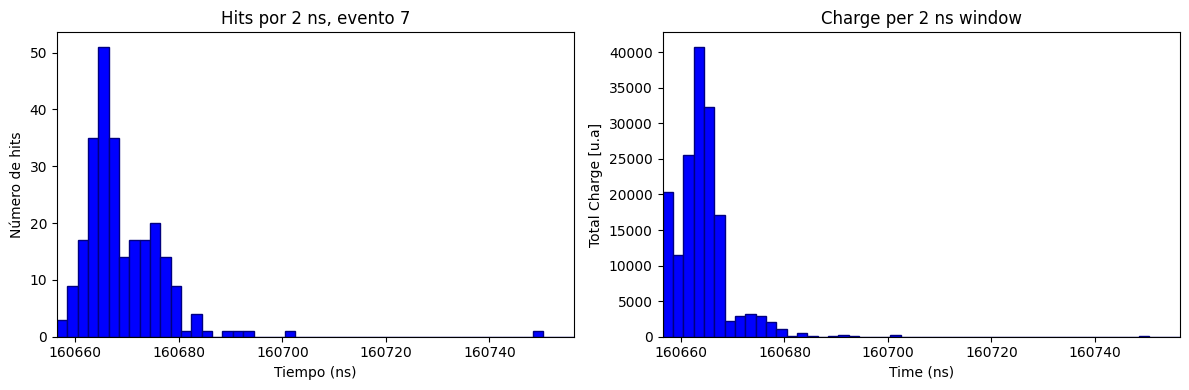

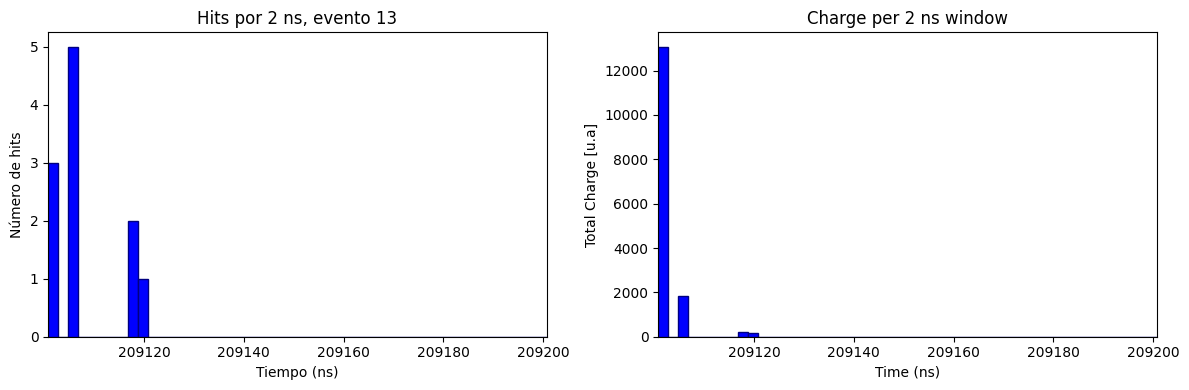

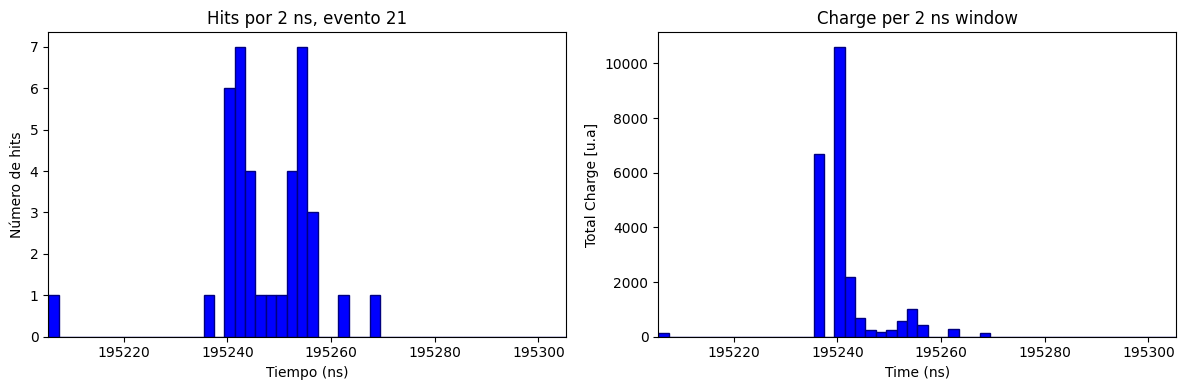

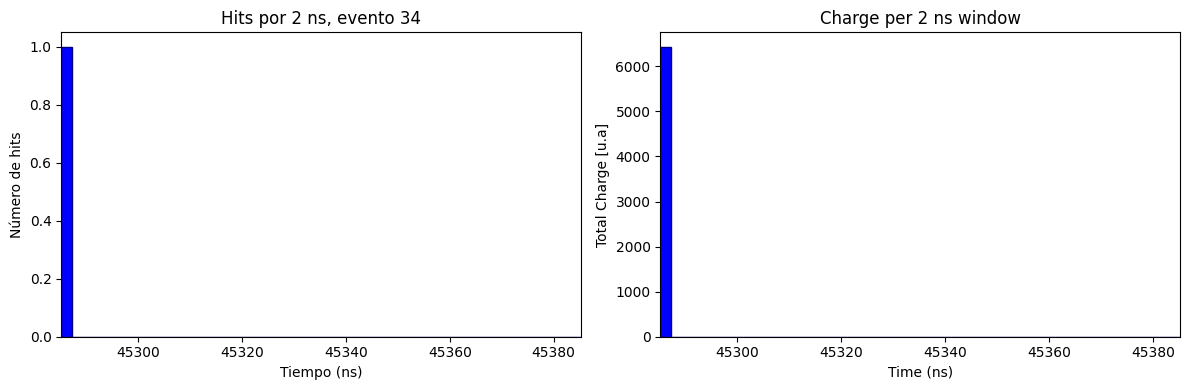

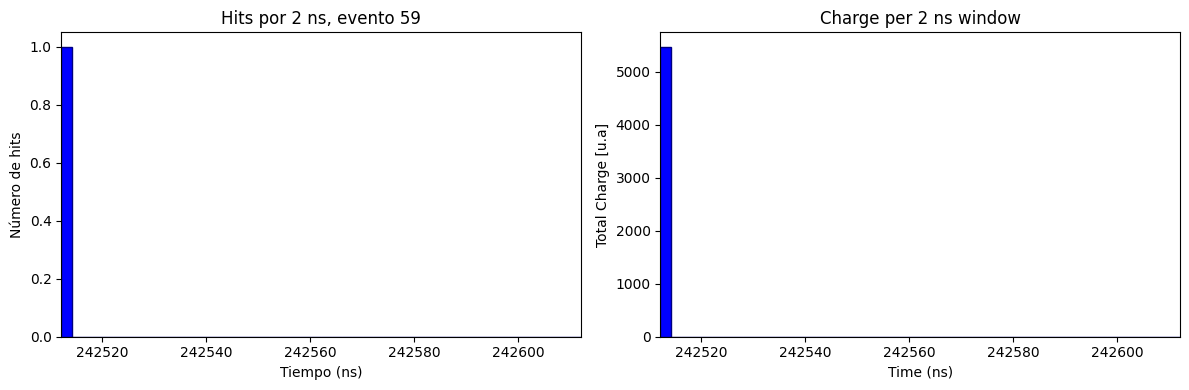

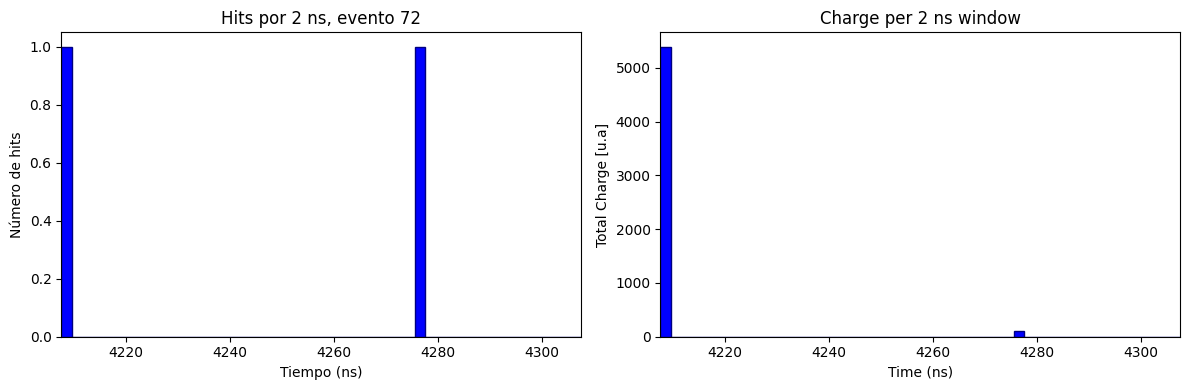

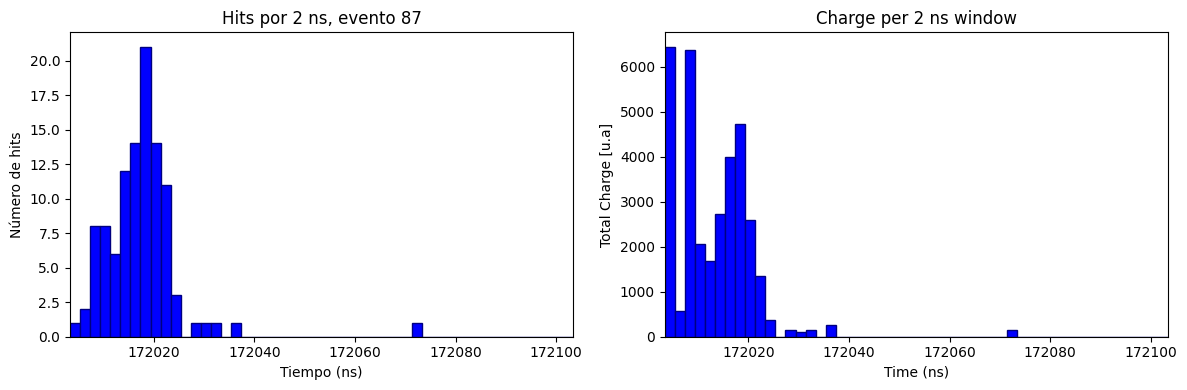

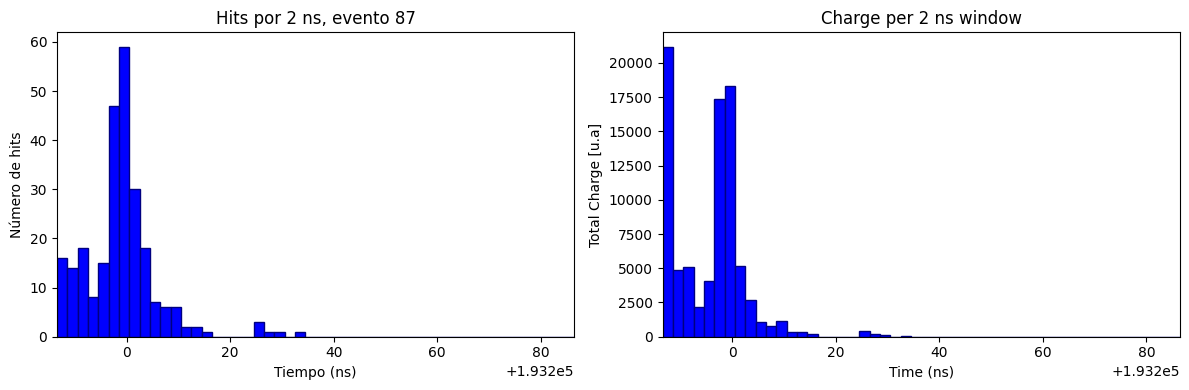

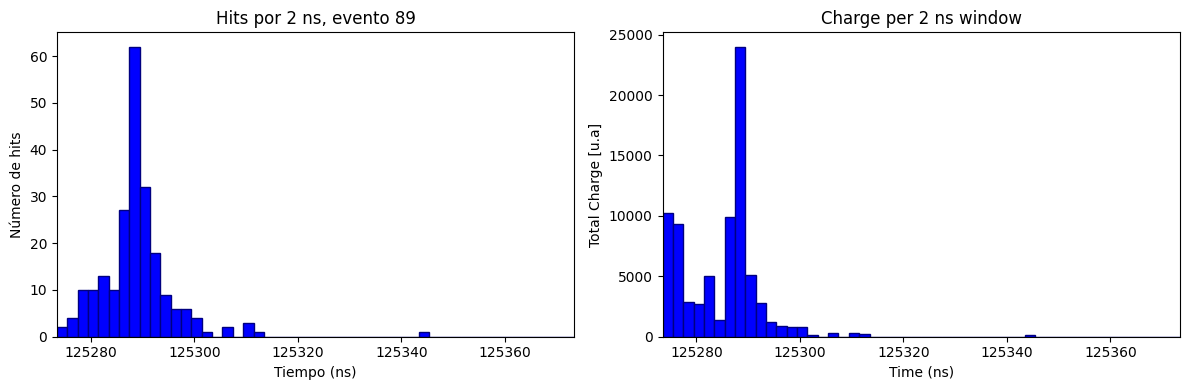

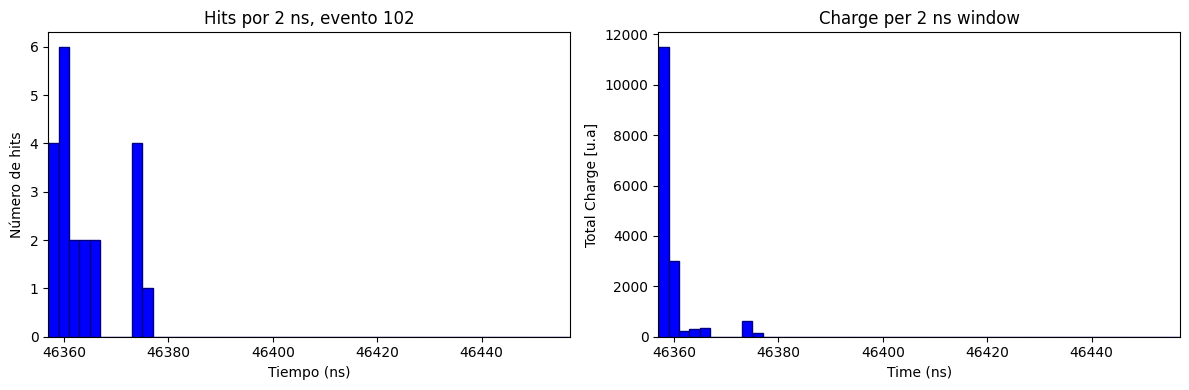

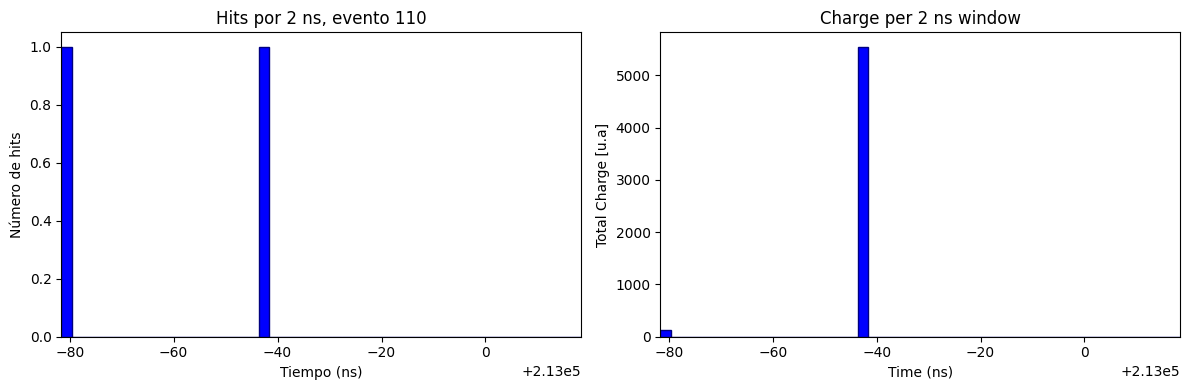

'\n        plt.figure(figsize=(8, 4))\n        plt.hist(charge, bins=100, color=\'blue\', edgecolor=\'navy\')\n        plt.xlabel(\'Charge (u.a)\')\n        plt.ylabel(\'Número de hits\')\n        plt.title("Histograma Charge in 50ns window")\n        plt.show()'

In [13]:
trigger_times_half = dict(list(threshold_charges.items())[0:10])
bin_time = 2
delta = 100

for event_number in trigger_times_half:
    for start_time in trigger_times_half[event_number]:
        times_branch_event = times_branch[event_number]
        charges_branch_event = charge_branch[event_number]

        mask = (times_branch_event >= start_time) & (times_branch_event < start_time + delta)

        time = times_branch_event[mask]
        charge = charges_branch_event[mask]

        plt.style.use('default')
        fig, axs = plt.subplots(1, 2, figsize=(12, 4))

        # --- Subplot 2: Histograma de número de hits en ventanas de 10 ns ---
        axs[0].hist(time, range=(start_time, start_time + delta), bins=int(delta/bin_time), color='blue', edgecolor='navy')
        axs[0].set_xlabel('Tiempo (ns)')
        axs[0].set_ylabel('Número de hits')
        axs[0].set_title(f"Hits por {bin_time} ns, evento {event_number}")
        axs[0].set_xlim(start_time, start_time+delta)

        sum_charges = functions_spills.plot_TotalCharge_Time(time, charge, bin_time, delta)

        axs[1].bar(np.arange(start_time, start_time+delta, bin_time), sum_charges, width = bin_time, color='blue',  align='edge', edgecolor='navy')
        axs[1].set_xlabel("Time (ns)")
        axs[1].set_ylabel("Total Charge [u.a]")
        axs[1].set_title(f"Charge per {bin_time} ns window")
        axs[1].set_xlim(start_time, start_time+delta)
        plt.tight_layout()
        plt.show()
"""
        plt.figure(figsize=(8, 4))
        plt.hist(charge, bins=100, color='blue', edgecolor='navy')
        plt.xlabel('Charge (u.a)')
        plt.ylabel('Número de hits')
        plt.title("Histograma Charge in 50ns window")
        plt.show()"""

In [14]:
def complemento_listas(lista1, lista2):
    resultado = []
    for arr1, arr2 in zip(lista1, lista2):
        # Convertir arr2 en conjunto para búsqueda rápida
        restantes = [x for x in arr1 if x not in arr2]
        resultado.append(np.array(restantes))
    return resultado

times_branch_sup5 = complemento_listas(times_branch_modified_chargesTT, times_branch_modified_50)
times_branch_sup5_sig = complemento_listas(times_branch_modified_chargesTT_sig, times_branch_modified_50_sig)


In [79]:
print(times_branch_sup5)

[array([], dtype=float64), array([58273.16474023, 58274.34277281, 58274.62746094, 58274.91336395,
       58275.64536254, 58276.24576254, 58278.41222551, 74158.72694727,
       74198.68432109, 74200.38430117, 74200.41545156, 74200.75872734,
       74202.72032051, 74202.73973984, 74205.47431094, 74206.13420723,
       74207.08615391, 74212.07393152]), array([ 40711.04923574,  40711.13102246,  40711.25798691,  40711.46509395,
        40711.49068848,  40711.50883703,  40711.65268359,  40711.79148371,
        40711.84671203,  40711.93160605,  40712.07408707,  40712.11545926,
        40712.15397695,  40712.15986289,  40712.25612793,  40712.65676566,
        40712.66822258,  40712.85191391,  40713.05583633,  40713.10972109,
        40713.87655703,  40713.95715547,  40713.97211547,  40714.1550293 ,
        40715.00665352,  40715.01115121,  40715.38794793,  40715.64993141,
        40716.08224051,  40716.29245703,  40716.34579434,  40717.02785586,
        40717.5365596 ,  40717.77200449,  40718.

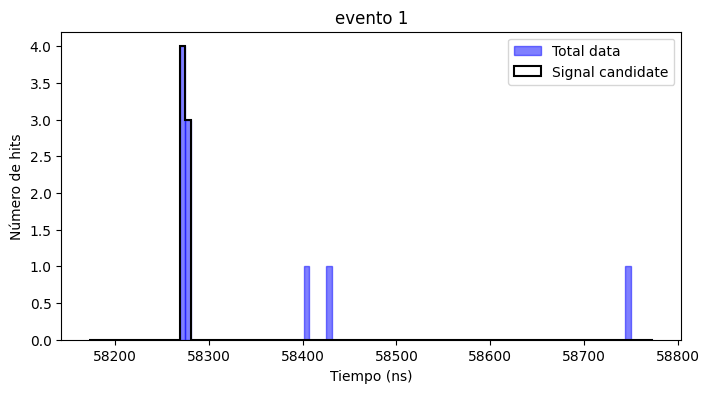

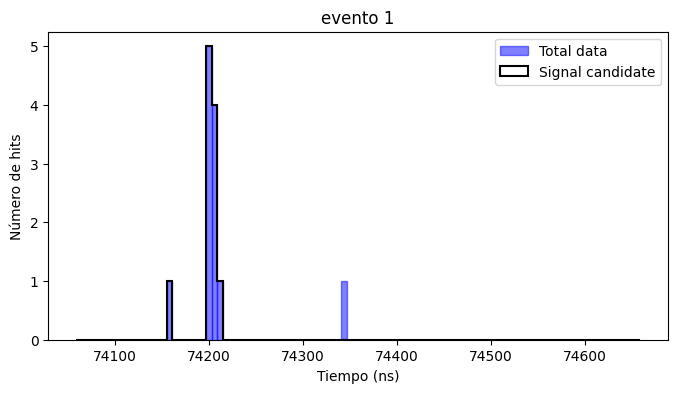

In [80]:
event_number = 1

for start_time in threshold_times_50[event_number]:
    plt.figure(figsize=(8, 4))
    plt.hist(times_branch_modified_chargesTT[event_number], range=[start_time-100, start_time + 500], bins=100, 
            color='blue', edgecolor='blue', alpha=0.5, label="Total data")
    plt.hist(times_branch_sup5[event_number], range=[start_time-100, start_time+500], bins=100, 
            histtype='step', color='black', linewidth=1.5, label="Signal candidate")
    plt.xlabel('Tiempo (ns)')
    plt.ylabel('Número de hits')
    plt.title(f'evento {event_number}')
    plt.legend()
    plt.show()


In [15]:
nDetections_event_in = []
nDetections_event_fin = []
nDetections_event_inf5 = []
nDetections_event_sup5 = []

for x in times_branch:
    nDetections_event_in.append(len(x))

for x in times_branch_modified_chargesTT:
    nDetections_event_fin.append(len(x))

for x in times_branch_modified_50:
    nDetections_event_inf5.append(len(x))

for x in times_branch_sup5:
    nDetections_event_sup5.append(len(x))



In [16]:
nDetections_event_in_sig = []
nDetections_event_fin_sig = []
nDetections_event_inf5_sig = []
nDetections_event_sup5_sig = []

for x in times_branch_sig:
    nDetections_event_in_sig.append(len(x))

for x in times_branch_modified_chargesTT_sig:
    nDetections_event_fin_sig.append(len(x))

for x in times_branch_modified_50_sig:
    nDetections_event_inf5_sig.append(len(x))

for x in times_branch_sup5_sig:
    nDetections_event_sup5_sig.append(len(x))

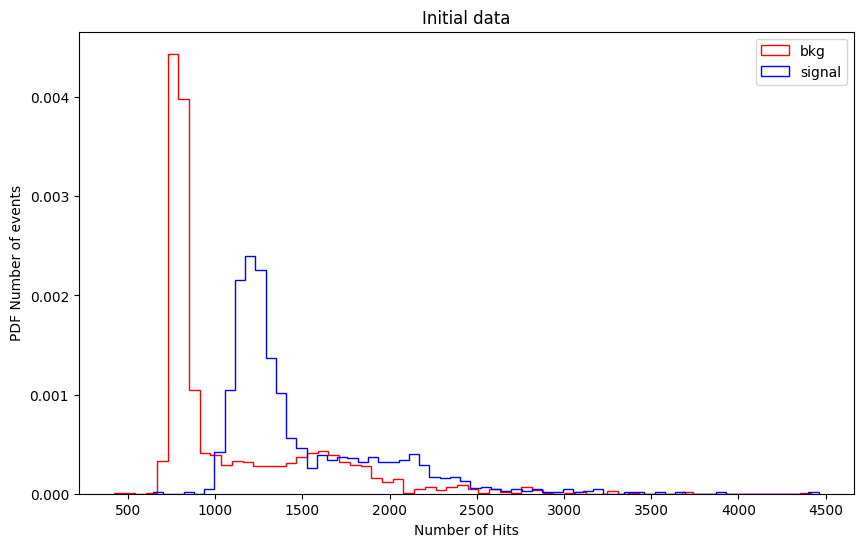

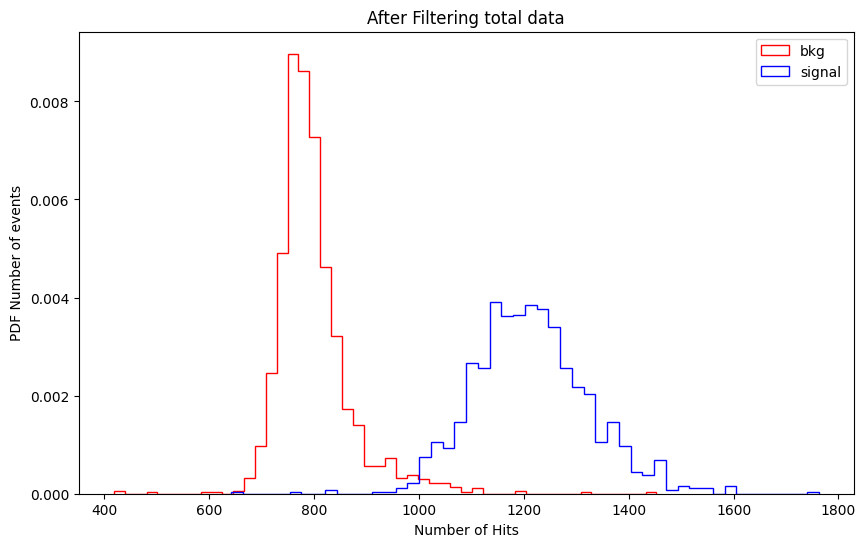

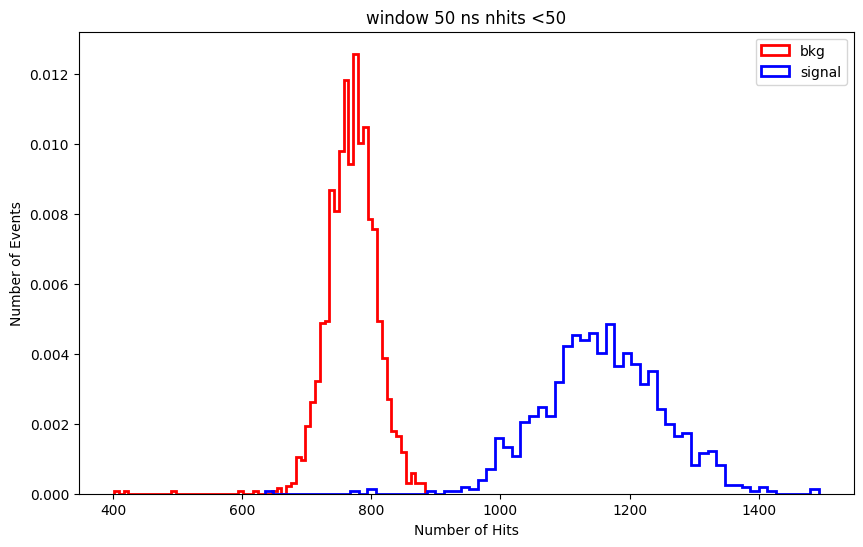

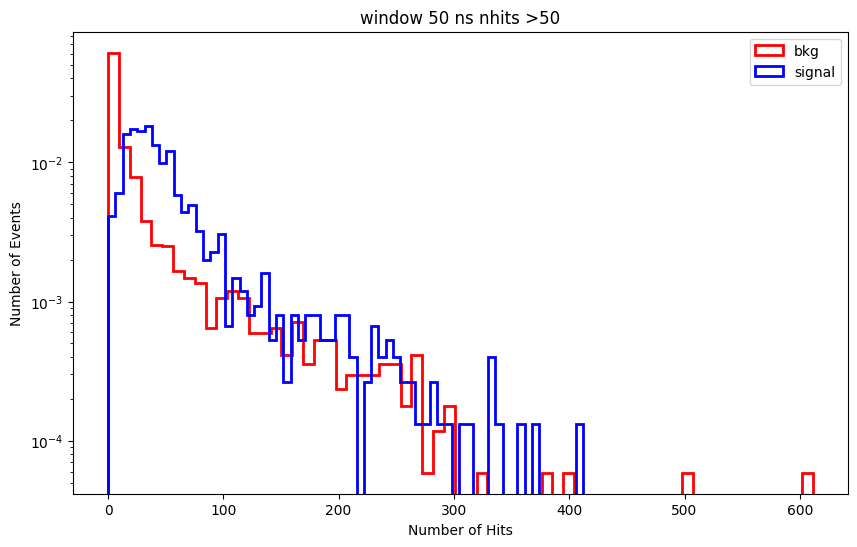

In [25]:
max_hist = 6500
bin_hist =  100#max_hist / n_bins  
n_bins = int(max_hist / bin_hist)

plt.figure(figsize=(10, 6), facecolor='white')
plt.hist(nDetections_event_in, bins=n_bins, color='red', histtype='step', linewidth=1, label='bkg', density=True)
plt.hist(nDetections_event_in_sig, bins=n_bins, color='blue', histtype='step', linewidth=1, label='signal', density=True)
plt.legend()
plt.xlabel('Number of Hits')
plt.ylabel('PDF Number of events')
plt.title('Initial data')
plt.show()

plt.figure(figsize=(10, 6), facecolor='white')
plt.hist(nDetections_event_fin, bins=50, color='red', histtype='step', linewidth=1, label='bkg', density=True)
plt.hist(nDetections_event_fin_sig, bins=50, color='blue', histtype='step', linewidth=1, label='signal', density=True)
plt.legend()
plt.xlabel('Number of Hits')
plt.ylabel('PDF Number of events')
plt.title('After Filtering total data')
plt.show()

plt.figure(figsize=(10, 6), facecolor='white')
plt.hist(nDetections_event_inf5, bins=n_bins, color='red', histtype='step', linewidth=2, label='bkg', density=True)
plt.hist(nDetections_event_inf5_sig, bins=n_bins, color='blue', histtype='step', linewidth=2, label='signal', density=True)
plt.legend()
plt.xlabel('Number of Hits')
plt.ylabel('Number of Events')
plt.title('window 50 ns nhits <50')
plt.show()

plt.figure(figsize=(10, 6), facecolor='white')
plt.hist(nDetections_event_sup5, bins=n_bins, color='red', histtype='step', linewidth=2, label='bkg', density=True)
plt.hist(nDetections_event_sup5_sig, bins=n_bins, color='blue', histtype='step', linewidth=2, label='signal', density=True)
plt.legend()
plt.xlabel('Number of Hits')
plt.ylabel('Number of Events')
plt.title('window 50 ns nhits >50')
plt.yscale("log")
plt.show()


In [32]:
bin_window = 4000

nHits_inf5 = functions_spills.counting_nHits_window(event_number_branch, times_branch_modified_50, bin_window)
nHits_sup5 = functions_spills.counting_nHits_window(event_number_branch, times_branch_sup5, bin_window)
nHits_tot = functions_spills.counting_nHits_window(event_number_branch, times_branch_modified_chargesTT, bin_window)
nHits_in = functions_spills.counting_nHits_window(event_number_branch, times_branch, bin_window)

nHits_inf5_sig = functions_spills.counting_nHits_window(event_number_branch_sig, times_branch_modified_50_sig, bin_window)
nHits_sup5_sig = functions_spills.counting_nHits_window(event_number_branch_sig, times_branch_sup5_sig, bin_window)
nHits_tot_sig = functions_spills.counting_nHits_window(event_number_branch_sig, times_branch_modified_chargesTT_sig, bin_window)
nHits_in_sig = functions_spills.counting_nHits_window(event_number_branch_sig, times_branch_sig, bin_window)



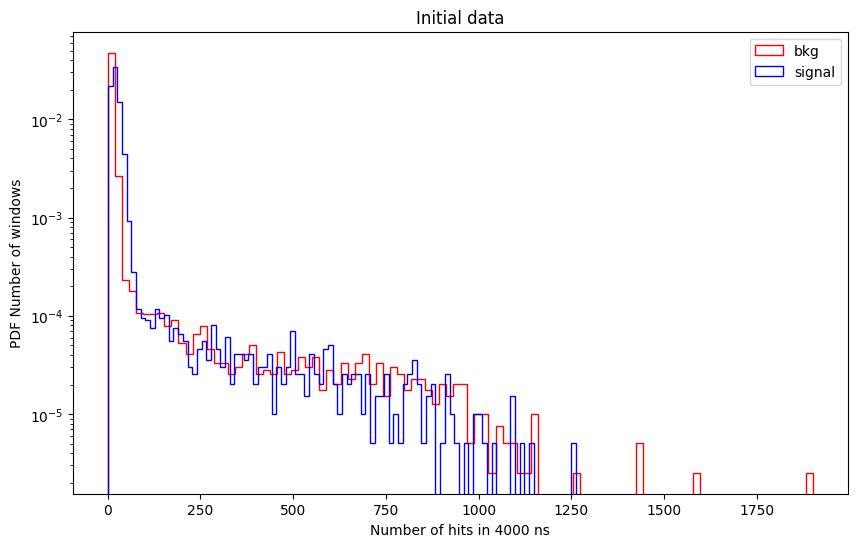

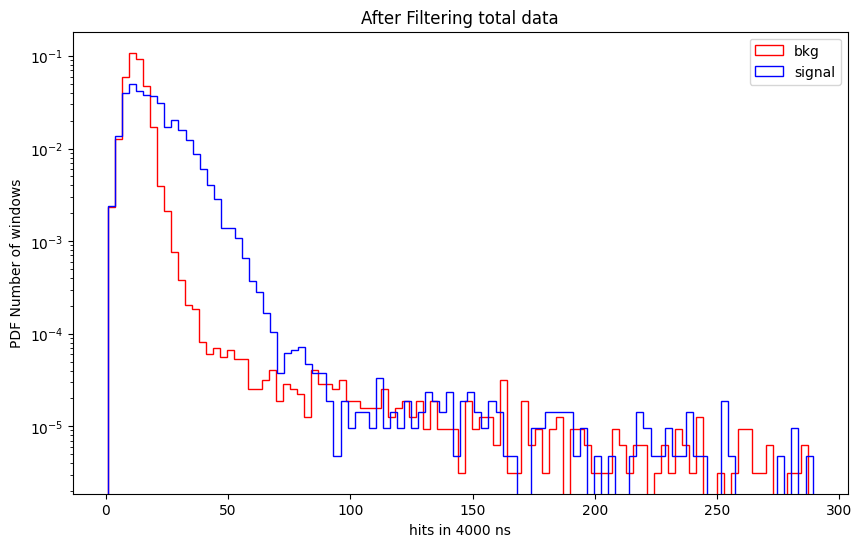

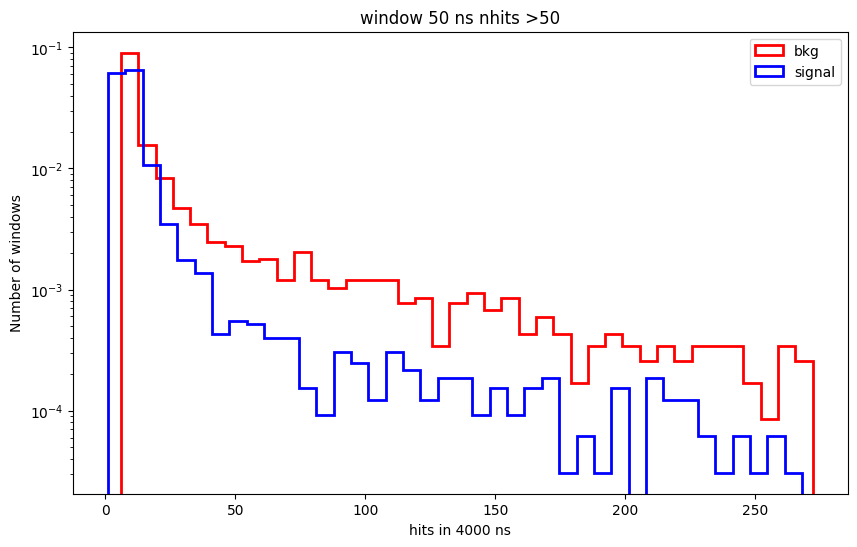

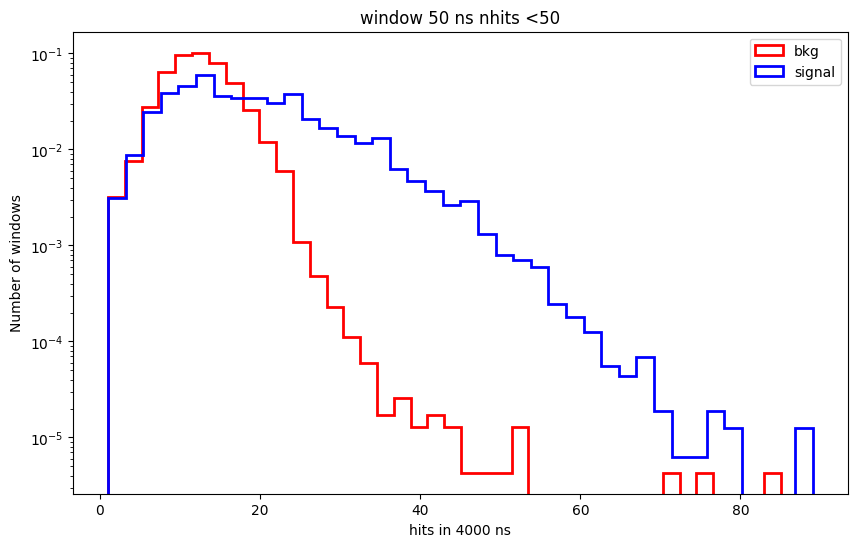

In [33]:
plt.figure(figsize=(10, 6))
plt.hist(nHits_in, bins=100, color='red', histtype='step', linewidth=1, label='bkg', density=True)
plt.hist(nHits_in_sig, bins=100, color='blue', histtype='step', linewidth=1, label='signal', density=True)
plt.ylabel("PDF Number of windows")
plt.xlabel(f"Number of hits in {bin_window} ns")
plt.title("Initial data")
plt.yscale('log')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(nHits_tot, bins=100, color='red', histtype='step', linewidth=1, label='bkg', density=True)
plt.hist(nHits_tot_sig, bins=100, color='blue', histtype='step', linewidth=1, label='signal', density=True)
plt.ylabel("PDF Number of windows")
plt.xlabel(f"hits in {bin_window} ns")
plt.title("After Filtering total data")
plt.yscale('log')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(nHits_sup5, bins=40, color='red', histtype='step', linewidth=2, label='bkg', density=True)
plt.hist(nHits_sup5_sig, bins=40, color='blue', histtype='step', linewidth=2, label='signal', density=True)
plt.ylabel("Number of windows")
plt.xlabel(f"hits in {bin_window} ns")
plt.title("window 50 ns nhits >50")
plt.yscale('log')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(nHits_inf5, bins=40, color='red', histtype='step', linewidth=2, label='bkg', density=True)
plt.hist(nHits_inf5_sig, bins=40, color='blue', histtype='step', linewidth=2, label='signal', density=True)
plt.ylabel("Number of windows")
plt.xlabel(f"hits in {bin_window} ns")
plt.title("window 50 ns nhits <50")
plt.yscale('log')
plt.legend()
plt.show()

